In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import PowerTransformer


In [ ]:
df = pd.read_excel("EFIS_data.xlsx", skiprows=4)
df.to_csv("EFIS_data.csv")

In [ ]:
df = pd.read_csv("EFIS_data.csv")

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[(df['Year'] >= 2011) & (df['Year'] <= 2021)]


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Year,Economic Freedom Summary Index,Rank,Quartile,1A Government consumption,data,1B Transfers and subsidies,data.1,...,5Cii Bureacracy costs,5Ciii Impartial Public Administration,5Civ Tax compliance,5C Business regulations,5Di Market openness,5Dii Business Permits,5Diii Distorton of the business environment,5D Freedom to enter markets and compete,5 Regulation,Area 5 Rank
count,1815.000000,0.0,1815.000000,1791.000000,1791.000000,1791.000000,1778.000000,1778.000000,1677.000000,1677.000000,...,1776.000000,1758.000000,1809.000000,1809.000000,1815.000000,1732.000000,825.000000,1815.000000,1815.000000,1815.000000
mean,907.000000,NaN,2016.000000,6.733462,81.702959,2.506421,5.529499,21.467555,7.624703,9.164720,...,5.262973,5.725170,5.785526,5.164610,5.931658,8.184185,5.260909,6.680223,6.538402,82.973003
std,524.089687,NaN,3.163149,1.055263,47.056759,1.120574,2.397275,8.963865,2.069196,7.548428,...,2.640229,2.405349,1.971124,1.678331,1.874149,1.343356,2.336767,1.512309,1.173604,47.683237
min,0.000000,NaN,2011.000000,2.470000,1.000000,1.000000,0.000000,1.950000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.000000,0.704410,2.028627,1.000000
25%,453.500000,NaN,2013.000000,6.030000,41.000000,2.000000,4.085294,15.212500,6.114441,2.867133,...,3.333333,3.823750,4.736741,4.051771,4.509076,7.535851,3.750000,5.762960,5.835578,42.000000
50%,907.000000,NaN,2016.000000,6.830000,82.000000,3.000000,5.766176,20.395000,8.294278,6.740000,...,5.333333,5.788750,5.953113,5.098895,6.080778,8.439101,5.000000,6.873144,6.618043,83.000000
75%,1360.500000,NaN,2019.000000,7.570000,123.000000,4.000000,7.290441,26.110000,9.351499,14.702651,...,7.333333,7.560000,6.861068,6.487897,7.360923,9.202518,7.500000,7.724681,7.353236,124.000000
max,1814.000000,NaN,2021.000000,9.160000,165.000000,4.000000,10.000000,59.862638,10.000000,34.890000,...,10.000000,10.000000,9.932744,9.227820,9.995473,9.999638,10.000000,9.959310,9.408518,165.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 0 to 1814
Data columns (total 87 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Unnamed: 0.1                                                 1815 non-null   int64  
 1   Unnamed: 0                                                   0 non-null      float64
 2   Year                                                         1815 non-null   int64  
 3   ISO Code 2                                                   1804 non-null   object 
 4   ISO Code 3                                                   1815 non-null   object 
 5   Countries                                                    1815 non-null   object 
 6   Economic Freedom Summary Index                               1791 non-null   float64
 7   Rank                                                         1791 non-null   f

In [ ]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['Year', 'ISO_Code_2', 'ISO_Code_3', 'Countries',
       'Economic_Freedom_Summary_Index', 'Rank', 'Quartile',
       '1A_Government_consumption', 'data', '1B__Transfers_and_subsidies',
       'data.1', '1C__Government_investment', 'data.2',
       '1Di_Top_marginal_income_tax_rate', 'data.3',
       '1Dii_Top_marginal_income_and_payroll_tax_rate', 'data.4',
       '1D__Top_marginal_tax_rate', 'IE_State_ownership',
       '1__Size_of_Government', 'Area_1_Rank', '2A__Judicial_independence',
       '2B__Impartial_courts', '2C__Property_rights',
       '2D__Military_interference', '2E_Legal_integrity', '2F_Contracts',
       '2G_Real_property', '2H_Police_and_crime', 'Gender_Disparity_Index',
       '2__Legal_System_&_Property_Rights_--_With_Gender_Adjustment',
       'Area_2_Rank',
       '2_Legal_System_&_Property_Rights_-_No_Gender_Adjustment',
       '3A__Money_growth', 'data.5', '3B__Standard_deviation_of_inflation',
       'data.6', '3C__Inflation', 'data.7',
       '3D__Forei

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 0 to 1814
Data columns (total 85 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         1815 non-null   int64  
 1   ISO_Code_2                                                   1804 non-null   object 
 2   ISO_Code_3                                                   1815 non-null   object 
 3   Countries                                                    1815 non-null   object 
 4   Economic_Freedom_Summary_Index                               1791 non-null   float64
 5   Rank                                                         1791 non-null   float64
 6   Quartile                                                     1791 non-null   float64
 7   1A_Government_consumption                                    1778 non-null   f

In [ ]:
df.rename(columns={'World_Bank_Current_Income_Classification,_1990-present': 'Income_Classification'}, inplace=True)

In [ ]:
df.dtypes

Year                                         int64
ISO_Code_2                                  object
ISO_Code_3                                  object
Countries                                   object
Economic_Freedom_Summary_Index             float64
                                            ...   
5D_Freedom_to_enter_markets_and_compete    float64
5__Regulation                              float64
Area_5_Rank                                float64
World_Bank_Region                           object
Income_Classification                       object
Length: 85, dtype: object

In [ ]:
categorical_cols = ['ISO_Code_2', 'ISO_Code_3', 'Countries', 'World_Bank_Region', 'Income_Classification']
df_onehot = pd.get_dummies(df, columns=categorical_cols)
df_label = df.copy()

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_label[col] = label_encoders[col].fit_transform(df_label[col])

In [ ]:
df_onehot.head()

,Year,Economic_Freedom_Summary_Index,Rank,Quartile,1A_Government_consumption,data,1B__Transfers_and_subsidies,data.1,1C__Government_investment,data.2,...,World_Bank_Region_Europe & Central Asia,World_Bank_Region_Latin America & the Caribbean,World_Bank_Region_Middle East & North Africa,World_Bank_Region_North America,World_Bank_Region_South Asia,World_Bank_Region_Sub-Saharan Africa,Income_Classification_H,Income_Classification_L,Income_Classification_LM,Income_Classification_UM
0,2021,7.60,31.0,1.0,7.758824,13.62,7.133515,11.020000,7.545714,23.59,...,1,0,0,0,0,0,0,0,0,1
1,2021,4.82,157.0,4.0,3.467647,28.21,7.817129,8.511137,3.997143,36.01,...,0,0,1,0,0,0,0,0,1,0
2,2021,5.38,149.0,4.0,7.179412,15.59,9.702997,1.590000,8.900000,18.85,...,0,0,0,0,0,1,0,0,1,0
3,2021,4.77,158.0,4.0,5.691176,20.65,5.536785,16.880000,8.702857,19.54,...,0,1,0,0,0,0,0,0,0,1
4,2021,7.58,33.0,1.0,6.473529,17.99,7.316076,10.350000,8.977143,18.58,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe()

,Year,Economic_Freedom_Summary_Index,Rank,Quartile,1A_Government_consumption,data,1B__Transfers_and_subsidies,data.1,1C__Government_investment,data.2,...,5Cii__Bureacracy_costs,5Ciii__Impartial_Public_Administration,5Civ_Tax_compliance,5C__Business_regulations,5Di__Market_openness,5Dii_Business_Permits,5Diii_Distorton_of_the_business_environment,5D_Freedom_to_enter_markets_and_compete,5__Regulation,Area_5_Rank
count,1815.000000,1791.000000,1791.000000,1791.000000,1778.000000,1778.000000,1677.000000,1677.000000,1770.000000,1770.000000,...,1776.000000,1758.000000,1809.000000,1809.000000,1815.000000,1732.000000,825.000000,1815.000000,1815.000000,1815.000000
mean,2016.000000,6.733462,81.702959,2.506421,5.529499,21.467555,7.624703,9.164720,7.114247,25.409892,...,5.262973,5.725170,5.785526,5.164610,5.931658,8.184185,5.260909,6.680223,6.538402,82.973003
std,3.163149,1.055263,47.056759,1.120574,2.397275,8.963865,2.069196,7.548428,3.189263,14.963177,...,2.640229,2.405349,1.971124,1.678331,1.874149,1.343356,2.336767,1.512309,1.173604,47.683237
min,2011.000000,2.470000,1.000000,1.000000,0.000000,1.950000,0.000000,0.000000,0.000000,1.006150,...,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.000000,0.704410,2.028627,1.000000
25%,2013.000000,6.030000,41.000000,2.000000,4.085294,15.212500,6.114441,2.867133,5.585908,15.621280,...,3.333333,3.823750,4.736741,4.051771,4.509076,7.535851,3.750000,5.762960,5.835578,42.000000
50%,2016.000000,6.830000,82.000000,3.000000,5.766176,20.395000,8.294278,6.740000,8.212682,21.255613,...,5.333333,5.788750,5.953113,5.098895,6.080778,8.439101,5.000000,6.873144,6.618043,83.000000
75%,2019.000000,7.570000,123.000000,4.000000,7.290441,26.110000,9.351499,14.702651,9.822491,30.449323,...,7.333333,7.560000,6.861068,6.487897,7.360923,9.202518,7.500000,7.724681,7.353236,124.000000
max,2021.000000,9.160000,165.000000,4.000000,10.000000,59.862638,10.000000,34.890000,10.000000,95.120000,...,10.000000,10.000000,9.932744,9.227820,9.995473,9.999638,10.000000,9.959310,9.408518,165.000000


In [ ]:
df = df_label
df.head()

,Year,ISO_Code_2,ISO_Code_3,Countries,Economic_Freedom_Summary_Index,Rank,Quartile,1A_Government_consumption,data,1B__Transfers_and_subsidies,...,5Civ_Tax_compliance,5C__Business_regulations,5Di__Market_openness,5Dii_Business_Permits,5Diii_Distorton_of_the_business_environment,5D_Freedom_to_enter_markets_and_compete,5__Regulation,Area_5_Rank,World_Bank_Region,Income_Classification
0,2021,1,1,0,7.60,31.0,1.0,7.758824,13.62,7.133515,...,3.587625,5.312221,6.810619,5.621940,6.250000,6.227520,6.972552,51.0,1,3
1,2021,43,44,1,4.82,157.0,4.0,3.467647,28.21,7.817129,...,4.764764,3.735188,4.412430,8.771111,3.134281,5.439274,4.836754,150.0,3,2
2,2021,3,0,2,5.38,149.0,4.0,7.179412,15.59,9.702997,...,4.641462,4.285256,3.099164,7.916416,1.250000,4.088527,4.730618,153.0,6,2
3,2021,4,3,3,4.77,158.0,4.0,5.691176,20.65,5.536785,...,4.504147,4.862998,6.144822,5.726521,2.922359,4.931234,5.299677,143.0,2,3
4,2021,2,4,4,7.58,33.0,1.0,6.473529,17.99,7.316076,...,6.020369,5.556860,5.590883,9.302574,5.000000,6.631152,6.939219,52.0,1,3


In [ ]:
# highest count of missing values
columns_to_exclude = ['5Diii_Distorton_of_the_business_environment', '2D__Military_interference']

# Inumerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# highest count of missing values
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]
categorical_columns = [col for col in categorical_columns if col not in columns_to_exclude]

# Median
for col in numerical_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Year                                       0
ISO_Code_2                                 0
ISO_Code_3                                 0
Countries                                  0
Economic_Freedom_Summary_Index             0
                                          ..
5D_Freedom_to_enter_markets_and_compete    0
5__Regulation                              0
Area_5_Rank                                0
World_Bank_Region                          0
Income_Classification                      0
Length: 85, dtype: int64


In [ ]:
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

2D__Military_interference                      306
5Diii_Distorton_of_the_business_environment    990
dtype: int64


In [ ]:
df['data.3'] = pd.to_numeric(df['data.3'], errors='coerce')
df['data.4'] = pd.to_numeric(df['data.4'], errors='coerce')
df['5Bv_Cost_of_worker_dismissal'] = pd.to_numeric(df['5Bv_Cost_of_worker_dismissal'], errors='coerce')

In [ ]:
df.head()

,Year,ISO_Code_2,ISO_Code_3,Countries,Economic_Freedom_Summary_Index,Rank,Quartile,1A_Government_consumption,data,1B__Transfers_and_subsidies,...,5Civ_Tax_compliance,5C__Business_regulations,5Di__Market_openness,5Dii_Business_Permits,5Diii_Distorton_of_the_business_environment,5D_Freedom_to_enter_markets_and_compete,5__Regulation,Area_5_Rank,World_Bank_Region,Income_Classification
0,2021,1,1,0,7.60,31.0,1.0,7.758824,13.62,7.133515,...,3.587625,5.312221,6.810619,5.621940,6.250000,6.227520,6.972552,51.0,1,3
1,2021,43,44,1,4.82,157.0,4.0,3.467647,28.21,7.817129,...,4.764764,3.735188,4.412430,8.771111,3.134281,5.439274,4.836754,150.0,3,2
2,2021,3,0,2,5.38,149.0,4.0,7.179412,15.59,9.702997,...,4.641462,4.285256,3.099164,7.916416,1.250000,4.088527,4.730618,153.0,6,2
3,2021,4,3,3,4.77,158.0,4.0,5.691176,20.65,5.536785,...,4.504147,4.862998,6.144822,5.726521,2.922359,4.931234,5.299677,143.0,2,3
4,2021,2,4,4,7.58,33.0,1.0,6.473529,17.99,7.316076,...,6.020369,5.556860,5.590883,9.302574,5.000000,6.631152,6.939219,52.0,1,3


In [ ]:
# checking if there is any object column
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

In [ ]:
missing_values_columns = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(missing_values_columns)

Columns with missing values:
Index(['data.3', 'data.4', '2D__Military_interference',
       '5Bv_Cost_of_worker_dismissal',
       '5Diii_Distorton_of_the_business_environment'],
      dtype='object')


In [ ]:
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

data.3                                          79
data.4                                          88
2D__Military_interference                      306
5Bv_Cost_of_worker_dismissal                     1
5Diii_Distorton_of_the_business_environment    990
dtype: int64


In [ ]:
mean_data_3 = df['data.3'].mean()
df['data.3'].fillna(mean_data_3, inplace=True)

In [ ]:
mean_data_4 = df['data.4'].mean()
df['data.4'].fillna(mean_data_4, inplace=True)

In [ ]:

df['data.5'] = df['data.5'].fillna(method='ffill')
df['data.7'] = df['data.7'].fillna(method='ffill')


In [ ]:
# changing missing values with the mean of the column
mean_value = df['5Diii_Distorton_of_the_business_environment'].mean()
df['5Diii_Distorton_of_the_business_environment'].fillna(mean_value, inplace=True)

In [ ]:
# changing missing values with the mean of the column
mean_value = df['5Diii_Distorton_of_the_business_environment'].mean()
df['5Diii_Distorton_of_the_business_environment'].fillna(mean_value, inplace=True)

In [ ]:
mean_value = df['2D__Military_interference'].mean()
df['2D__Military_interference'].fillna(mean_value, inplace=True)

In [ ]:
if '5Bv_Cost_of_worker_dismissal' in df.columns:
    mean_value_5Bv = df['5Bv_Cost_of_worker_dismissal'].mean()
    df['5Bv_Cost_of_worker_dismissal'].fillna(mean_value_5Bv, inplace=True)

In [ ]:
print(df[['data.3', 'data.4', 'data.5', 'data.7','2D__Military_interference','5Bv_Cost_of_worker_dismissal']].isnull().sum())

data.3                          0
data.4                          0
data.5                          0
data.7                          0
2D__Military_interference       0
5Bv_Cost_of_worker_dismissal    0
dtype: int64


In [ ]:
# descriptive statistics
descriptive_stats = df.describe()

In [ ]:
descriptive_stats

,Year,ISO_Code_2,ISO_Code_3,Countries,Economic_Freedom_Summary_Index,Rank,Quartile,1A_Government_consumption,data,1B__Transfers_and_subsidies,...,5Civ_Tax_compliance,5C__Business_regulations,5Di__Market_openness,5Dii_Business_Permits,5Diii_Distorton_of_the_business_environment,5D_Freedom_to_enter_markets_and_compete,5__Regulation,Area_5_Rank,World_Bank_Region,Income_Classification
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,...,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,2016.000000,82.000000,82.000000,82.000000,6.734738,81.706887,2.512948,5.534324,21.445690,7.675613,...,5.786080,5.164393,5.931658,8.195843,5.260909,6.680223,6.538402,82.973003,2.775758,1.488154
std,3.163149,47.643649,47.643649,47.643649,1.048317,46.744444,1.114564,2.372936,8.873272,1.996839,...,1.967885,1.675558,1.874149,1.313344,1.574927,1.512309,1.173604,47.683237,2.225409,1.194783
min,2011.000000,0.000000,0.000000,0.000000,2.470000,1.000000,1.000000,0.000000,1.950000,0.000000,...,0.000000,0.000000,0.833333,0.000000,0.000000,0.704410,2.028627,1.000000,0.000000,0.000000
25%,2013.000000,41.000000,41.000000,41.000000,6.040000,42.000000,2.000000,4.130882,15.340000,6.317439,...,4.736741,4.055678,4.509076,7.561257,5.260909,5.762960,5.835578,42.000000,1.000000,0.000000
50%,2016.000000,82.000000,82.000000,82.000000,6.830000,82.000000,3.000000,5.766176,20.395000,8.294278,...,5.953113,5.098895,6.080778,8.439101,5.260909,6.873144,6.618043,83.000000,2.000000,2.000000
75%,2019.000000,123.000000,123.000000,123.000000,7.550000,122.000000,3.500000,7.252941,25.955000,9.263842,...,6.858006,6.483221,7.360923,9.162405,5.260909,7.724681,7.353236,124.000000,6.000000,3.000000
max,2021.000000,164.000000,164.000000,164.000000,9.160000,165.000000,4.000000,10.000000,59.862638,10.000000,...,9.932744,9.227820,9.995473,9.999638,10.000000,9.959310,9.408518,165.000000,6.000000,4.000000


In [ ]:
skewness = df.skew()
skewed_columns = skewness[skewness > 1].index
skewed_columns

Index(['data.6', 'data.8', 'data.9', 'data.10'], dtype='object')

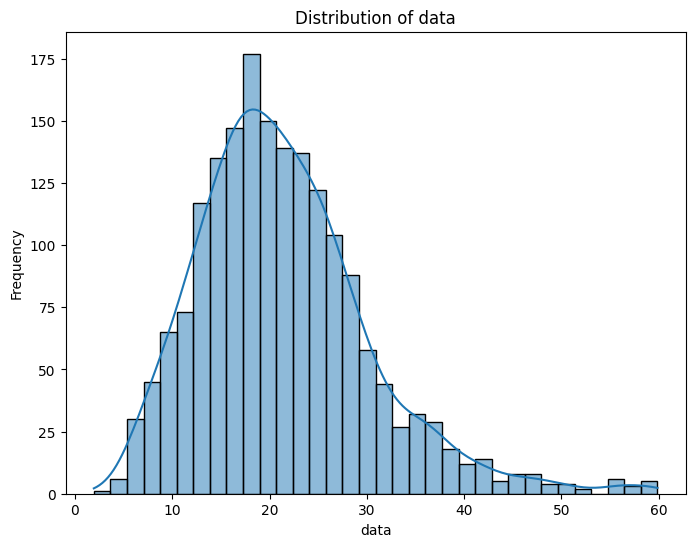

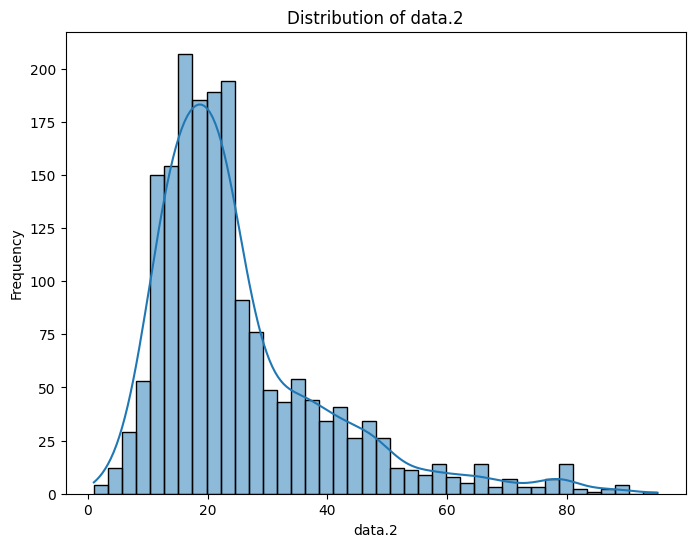

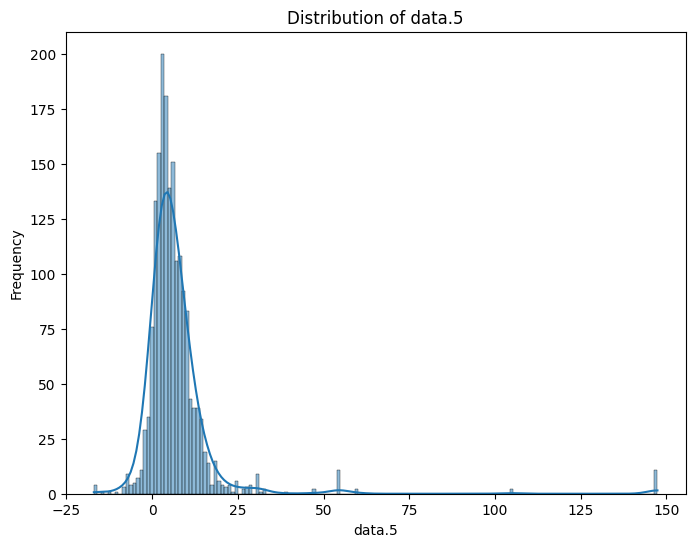

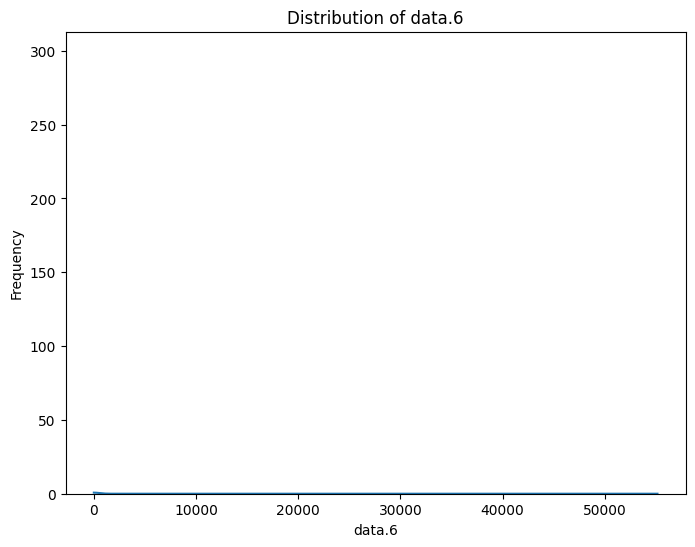

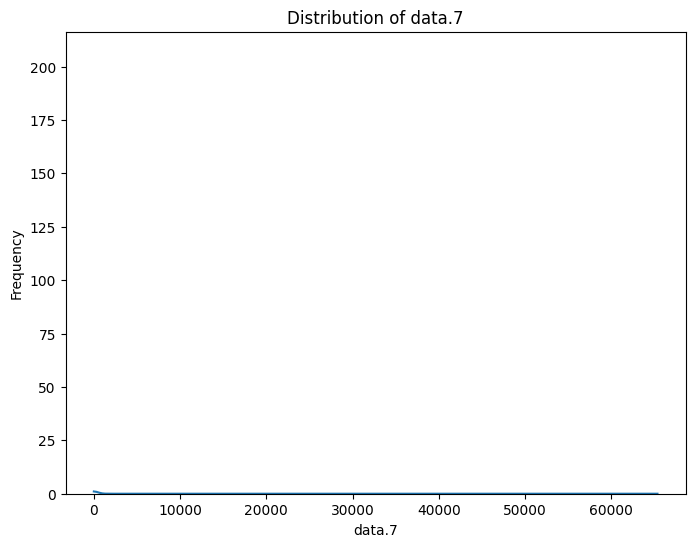

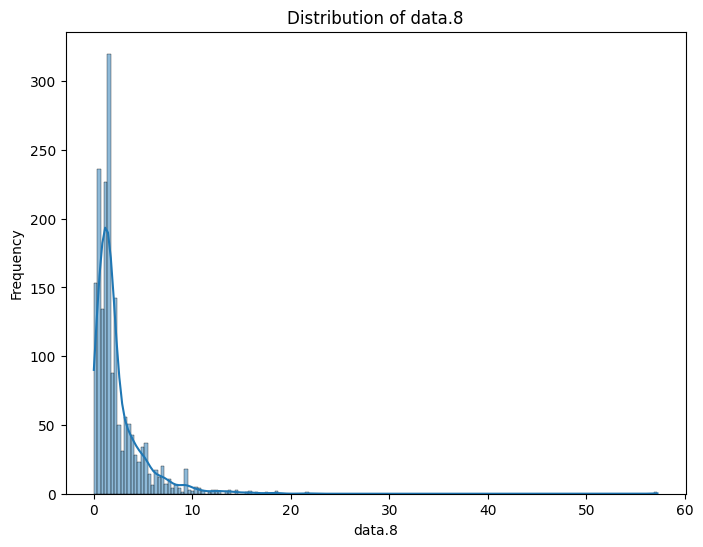

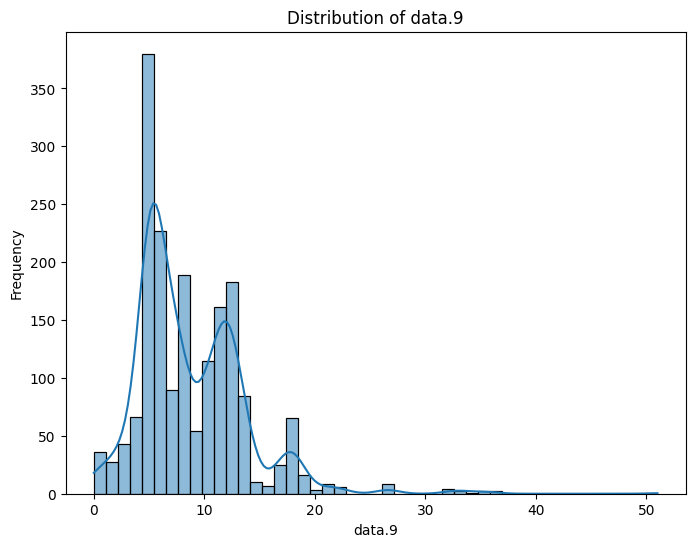

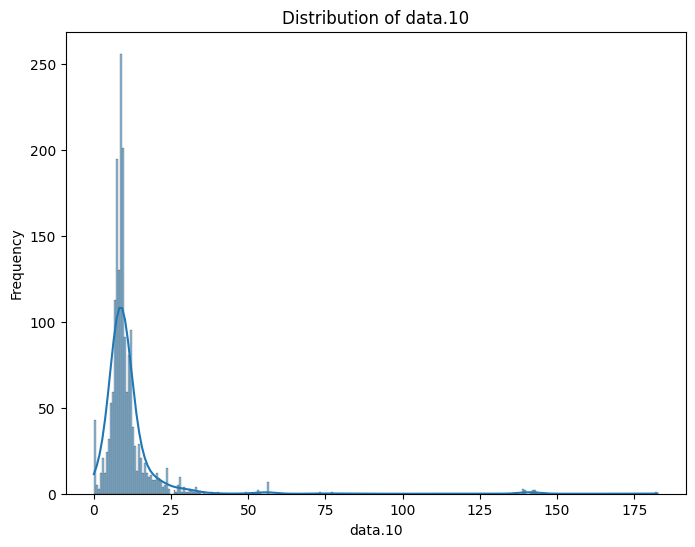

In [ ]:
for col in skewed_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#log transformation
for col in skewed_columns:
    df[col] = np.log1p(df[col])

In [ ]:
df.columns

Index(['Year', 'ISO_Code_2', 'ISO_Code_3', 'Countries',
       'Economic_Freedom_Summary_Index', 'Rank', 'Quartile',
       '1A_Government_consumption', 'data', '1B__Transfers_and_subsidies',
       'data.1', '1C__Government_investment', 'data.2',
       '1Di_Top_marginal_income_tax_rate', 'data.3',
       '1Dii_Top_marginal_income_and_payroll_tax_rate', 'data.4',
       '1D__Top_marginal_tax_rate', 'IE_State_ownership',
       '1__Size_of_Government', 'Area_1_Rank', '2A__Judicial_independence',
       '2B__Impartial_courts', '2C__Property_rights',
       '2D__Military_interference', '2E_Legal_integrity', '2F_Contracts',
       '2G_Real_property', '2H_Police_and_crime', 'Gender_Disparity_Index',
       '2__Legal_System_&_Property_Rights_--_With_Gender_Adjustment',
       'Area_2_Rank',
       '2_Legal_System_&_Property_Rights_-_No_Gender_Adjustment',
       '3A__Money_growth', '3B__Standard_deviation_of_inflation', 'data.6',
       '3C__Inflation', '3D__Foreign_currency_bank_accounts',

In [ ]:
df.drop(columns=['data.7','data.5'], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [ ]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif = calculate_vif(df)
vif.to_csv('vif_results.csv', index=False)

In [ ]:
target_variable = df['Economic_Freedom_Summary_Index']

In [ ]:

columns_to_skip = []

def remove_high_vif_features(df, threshold=10, columns_to_skip=None):
    while True:
        vif = calculate_vif(df.drop(columns=columns_to_skip))
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif['VIF'] == max_vif, 'Feature'].values[0]
            print(f'Removing feature {feature_to_remove} with VIF {max_vif}')
            df = df.drop(columns=[feature_to_remove])
        else:
            break
    return df, vif

df_reduced, final_vif = remove_high_vif_features(df, columns_to_skip=columns_to_skip)
print(final_vif)


Removing feature Year with VIF 19871.732917457444
Removing feature Economic_Freedom_Summary_Index with VIF 16157.064805257594
Removing feature 5__Regulation with VIF 8985.644514231628
Removing feature 4__Freedom_to_trade_internationally with VIF 4852.734901225283
Removing feature 3__Sound_Money with VIF 4494.532359563653
Removing feature data with VIF 4439.278986390391
Removing feature 2_Legal_System_&_Property_Rights_-_No_Gender_Adjustment with VIF 3378.7004498581205
Removing feature 4A__Tariffs with VIF 2561.1383196871225
Removing feature data.2 with VIF 1805.6165384560763
Removing feature 2__Legal_System_&_Property_Rights_--_With_Gender_Adjustment with VIF 1596.4154252558294
Removing feature 1__Size_of_Government with VIF 1509.0373680361863
Removing feature 5C__Business_regulations with VIF 1121.190958305836
Removing feature 5B__Labor_market_regulations with VIF 892.5786499216939
Removing feature 1D__Top_marginal_tax_rate with VIF 805.098455143029
Removing feature 5A__Credit_market_

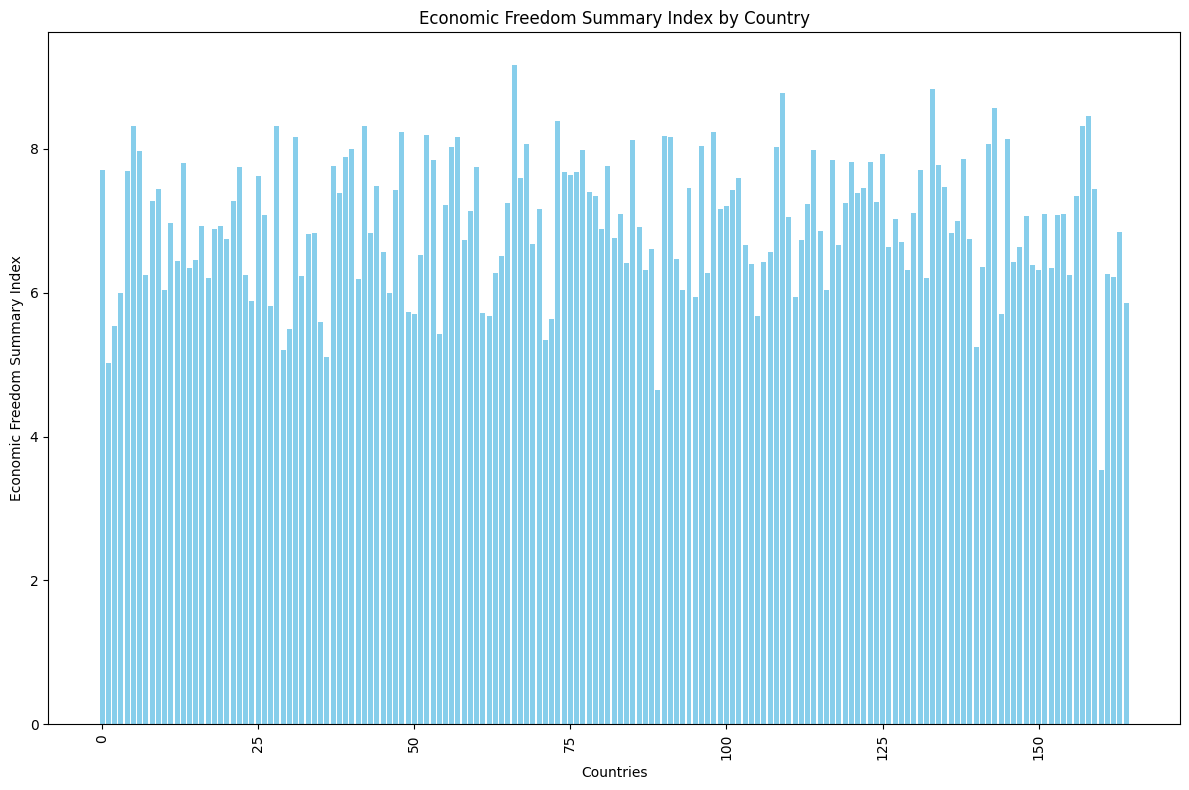

In [ ]:
countries = df['Countries']
economic_freedom_index = df['Economic_Freedom_Summary_Index']


plt.figure(figsize=(12, 8))
plt.bar(countries, economic_freedom_index, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Economic Freedom Summary Index by Country')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

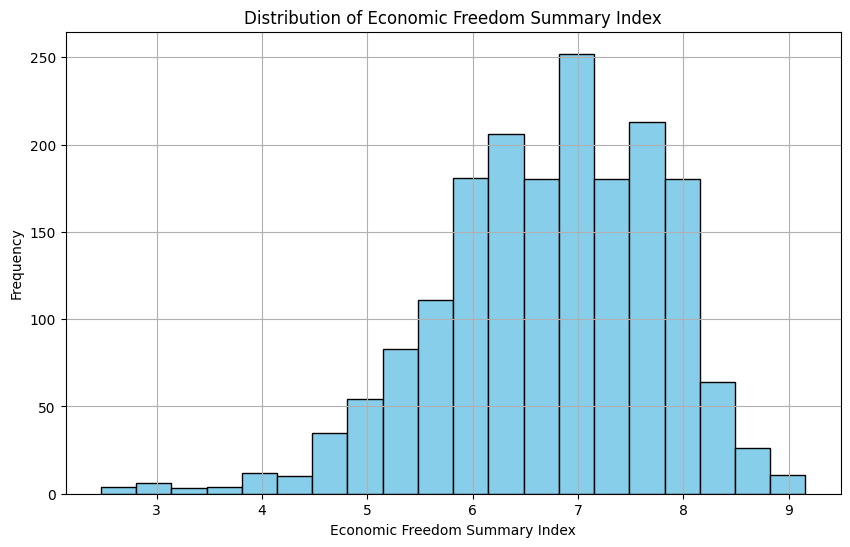

In [ ]:
economic_freedom_index = df['Economic_Freedom_Summary_Index']


plt.figure(figsize=(10, 6))
plt.hist(economic_freedom_index, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Frequency')
plt.title('Distribution of Economic Freedom Summary Index')
plt.grid(True)


plt.show()

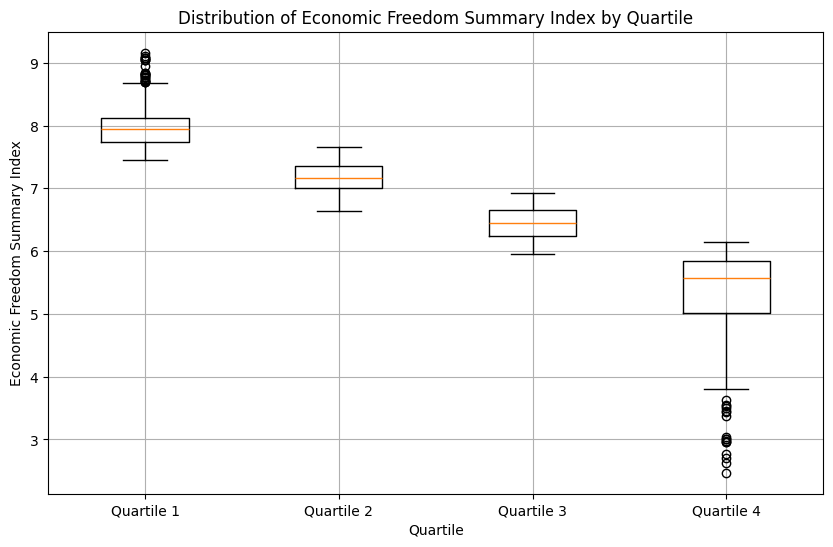

In [ ]:
quartile = df['Quartile']
economic_freedom_index = df['Economic_Freedom_Summary_Index']

plt.figure(figsize=(10, 6))
plt.boxplot([economic_freedom_index[quartile == 1],
             economic_freedom_index[quartile == 2],
             economic_freedom_index[quartile == 3],
             economic_freedom_index[quartile == 4]],
            labels=['Quartile 1', 'Quartile 2', 'Quartile 3', 'Quartile 4'])
plt.xlabel('Quartile')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Distribution of Economic Freedom Summary Index by Quartile')
plt.grid(True)

plt.show()


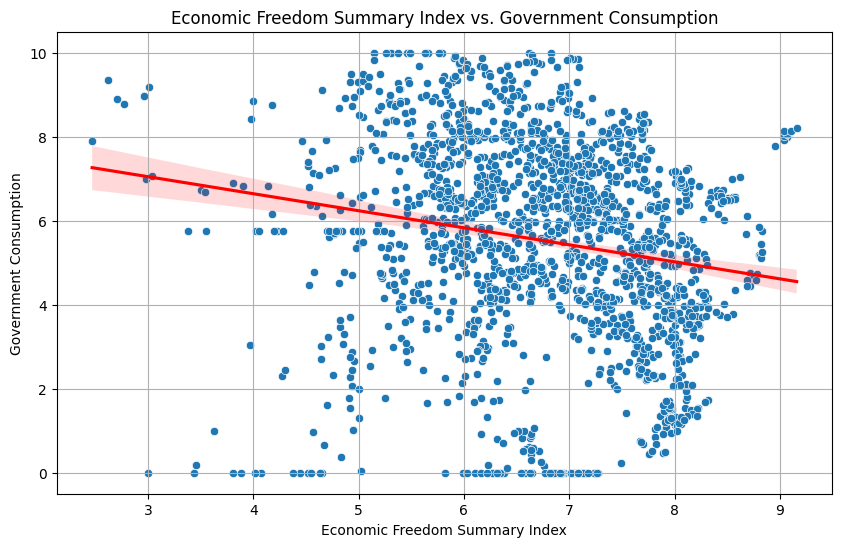

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economic_Freedom_Summary_Index', y='1A_Government_consumption', data=df)
sns.regplot(x='Economic_Freedom_Summary_Index', y='1A_Government_consumption', data=df, scatter=False, color='red')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Government Consumption')
plt.title('Economic Freedom Summary Index vs. Government Consumption')
plt.grid(True)
plt.show()

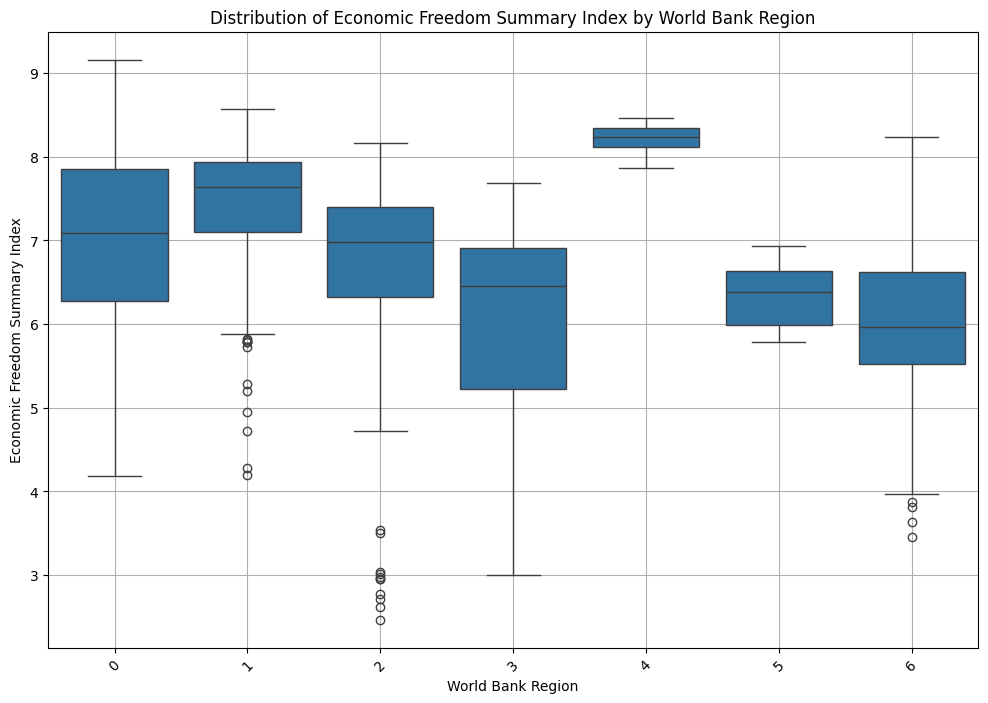

In [ ]:
economic_freedom_index = df['Economic_Freedom_Summary_Index']
world_bank_region = df['World_Bank_Region']


plt.figure(figsize=(12, 8))
sns.boxplot(x=world_bank_region, y=economic_freedom_index)
plt.xlabel('World Bank Region')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Distribution of Economic Freedom Summary Index by World Bank Region')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

0: 7.09
1: 7.64
2: 6.99
3: 6.45
4: 8.23
5: 6.38
6: 5.96


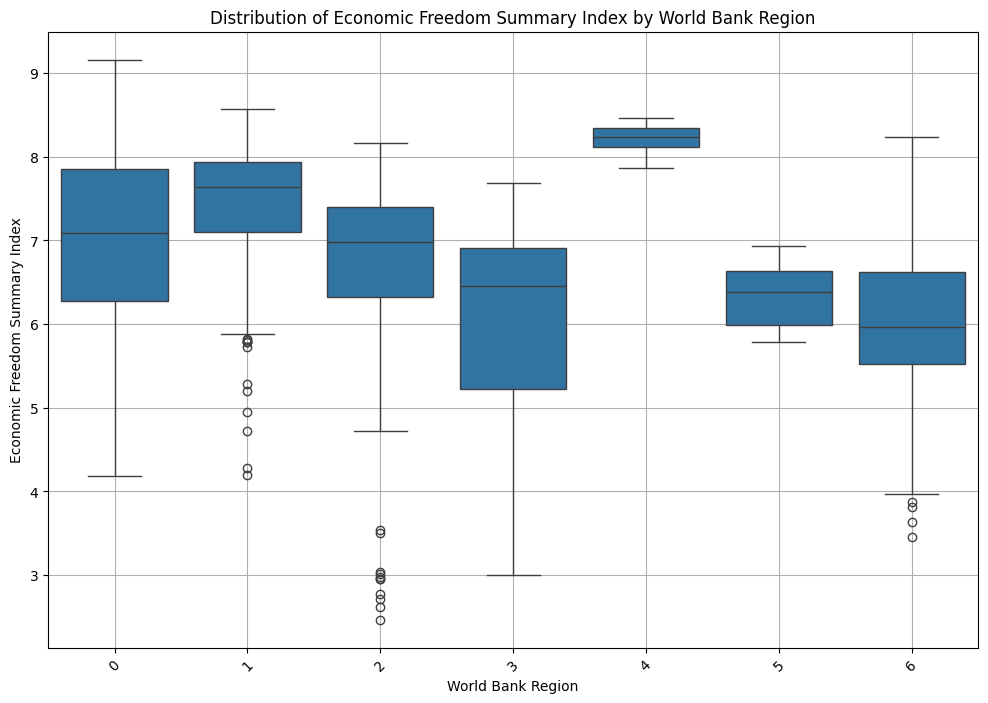

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=world_bank_region, y=economic_freedom_index)
plt.xlabel('World Bank Region')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Distribution of Economic Freedom Summary Index by World Bank Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

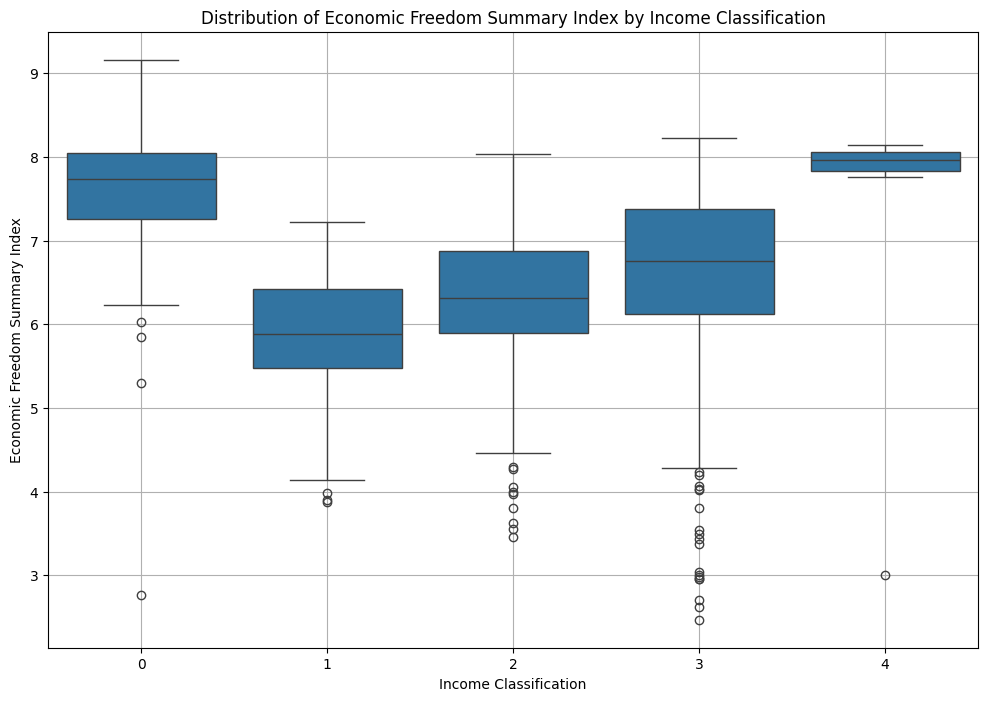

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Classification', y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Income Classification')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Distribution of Economic Freedom Summary Index by Income Classification')
plt.grid(True)
plt.show()

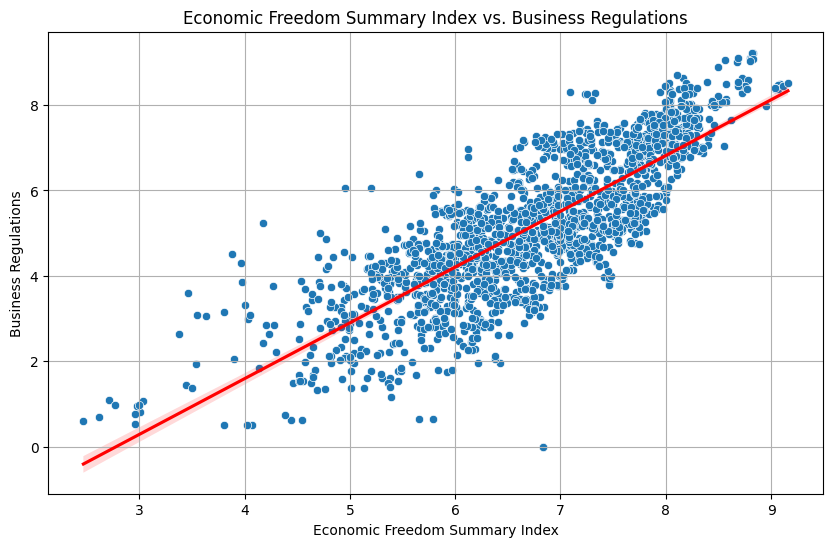

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economic_Freedom_Summary_Index', y='5C__Business_regulations', data=df)
sns.regplot(x='Economic_Freedom_Summary_Index', y='5C__Business_regulations', data=df, scatter=False, color='red')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Business Regulations')
plt.title('Economic Freedom Summary Index vs. Business Regulations')
plt.grid(True)
plt.show()


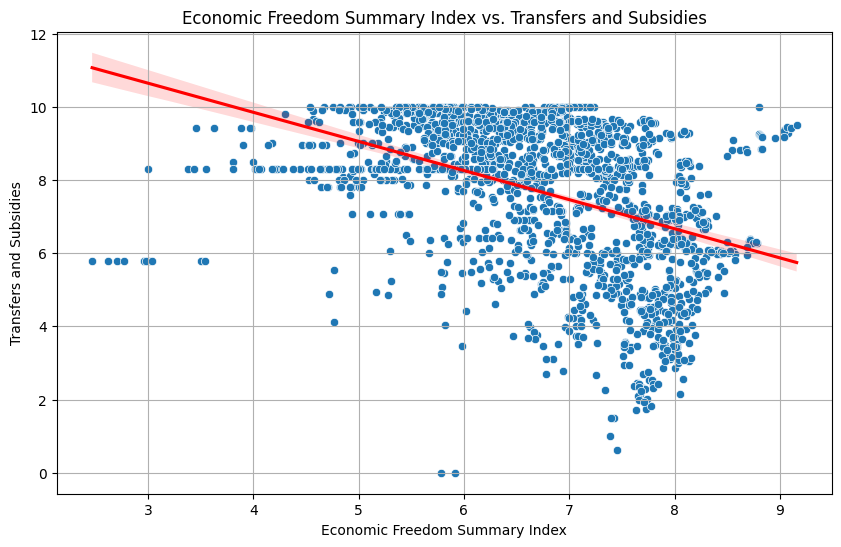

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economic_Freedom_Summary_Index', y='1B__Transfers_and_subsidies', data=df)
sns.regplot(x='Economic_Freedom_Summary_Index', y='1B__Transfers_and_subsidies', data=df, scatter=False, color='red')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Transfers and Subsidies')
plt.title('Economic Freedom Summary Index vs. Transfers and Subsidies')
plt.grid(True)
plt.show()


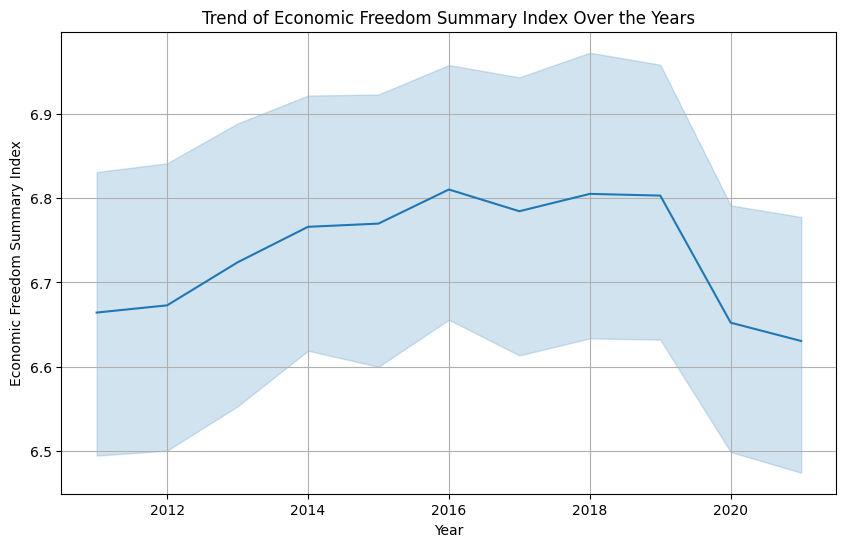

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Year')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Trend of Economic Freedom Summary Index Over the Years')
plt.grid(True)
plt.show()


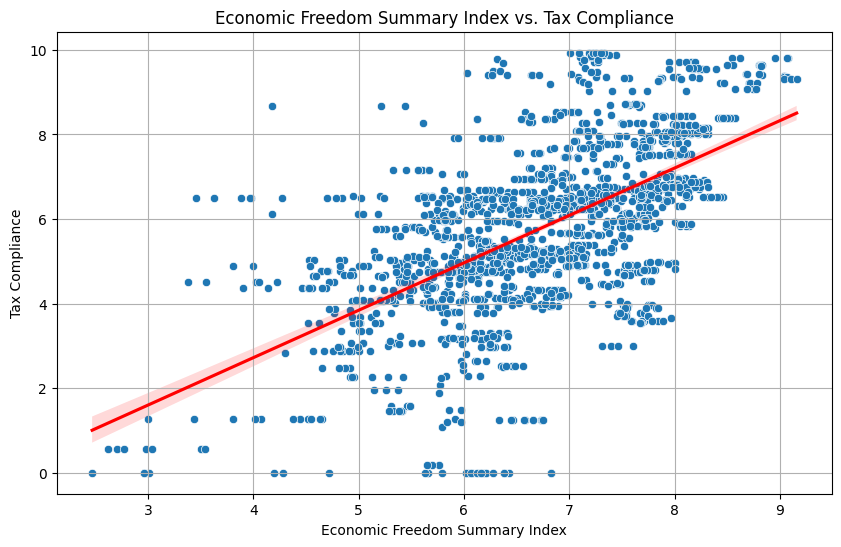

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economic_Freedom_Summary_Index', y='5Civ_Tax_compliance', data=df)
sns.regplot(x='Economic_Freedom_Summary_Index', y='5Civ_Tax_compliance', data=df, scatter=False, color='red')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Tax Compliance')
plt.title('Economic Freedom Summary Index vs. Tax Compliance')
plt.grid(True)
plt.show()


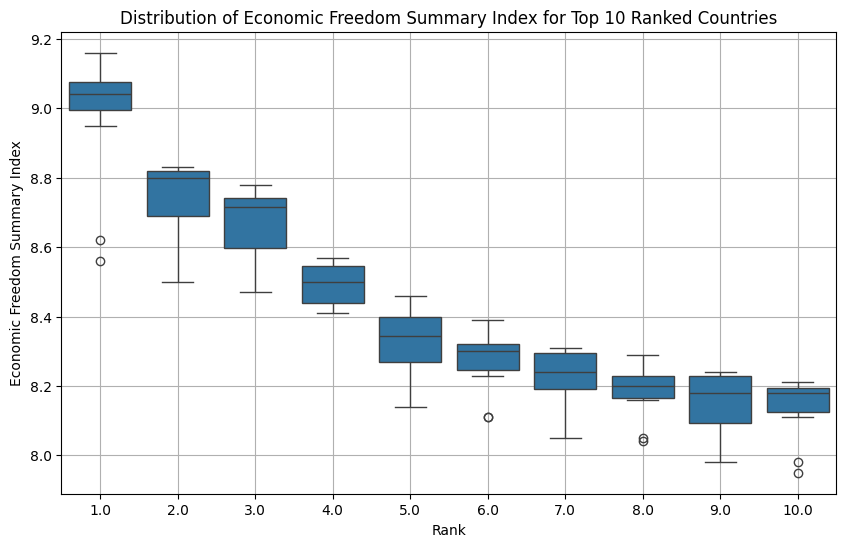

In [ ]:

top_10_ranked = df[df['Rank'] <= 10]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rank', y='Economic_Freedom_Summary_Index', data=top_10_ranked)
plt.xlabel('Rank')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Distribution of Economic Freedom Summary Index for Top 10 Ranked Countries')
plt.grid(True)
plt.show()



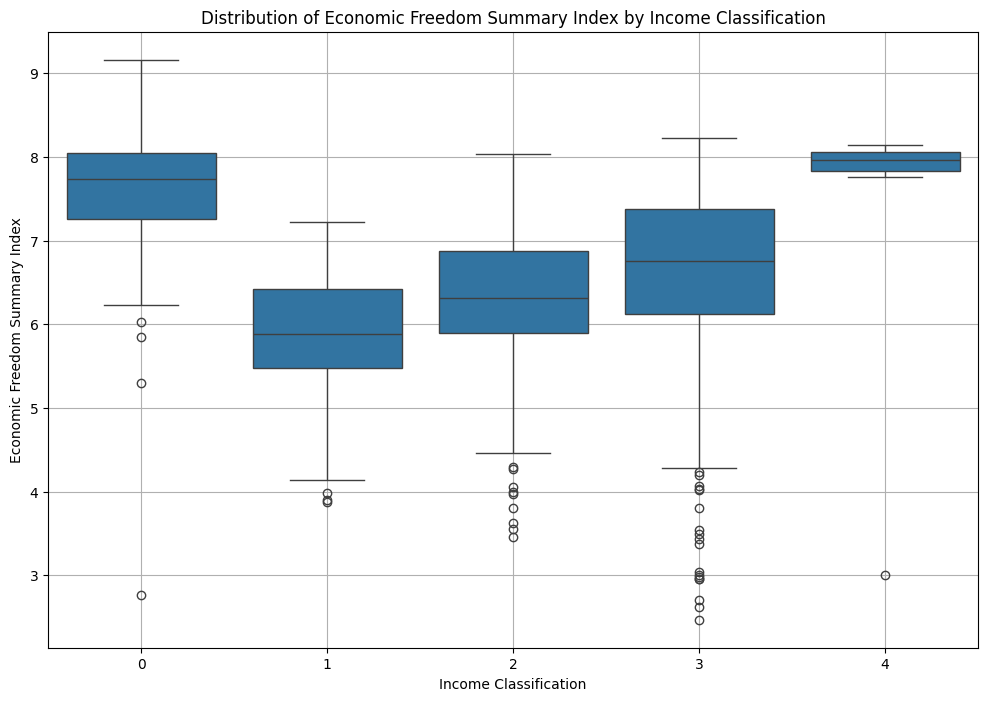

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Classification', y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Income Classification')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Distribution of Economic Freedom Summary Index by Income Classification')
plt.grid(True)
plt.show()

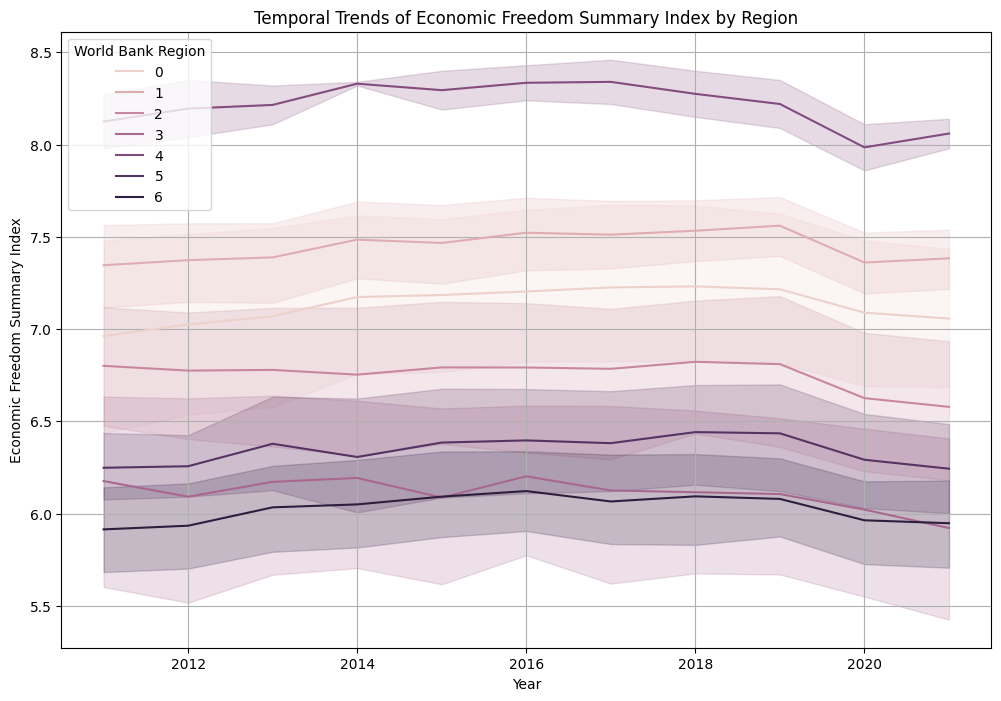

In [ ]:

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Economic_Freedom_Summary_Index', hue='World_Bank_Region', data=df)
plt.xlabel('Year')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Temporal Trends of Economic Freedom Summary Index by Region')
plt.grid(True)
plt.legend(title='World Bank Region', loc='upper left')
plt.show()



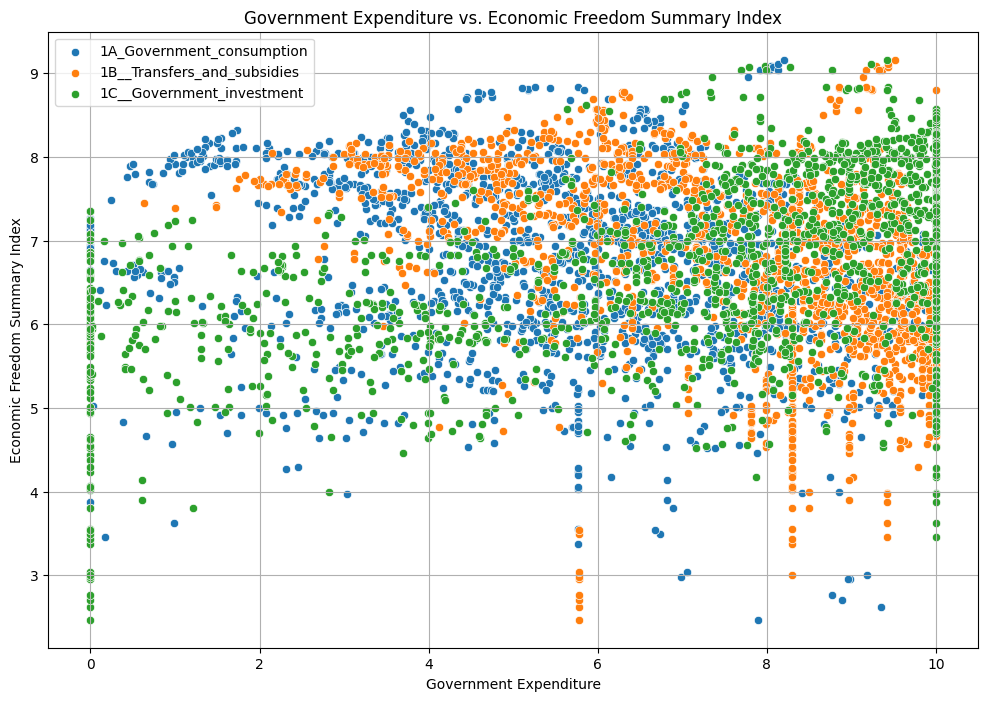

In [ ]:
# Define relevant columns
government_columns = ['1A_Government_consumption', '1B__Transfers_and_subsidies', '1C__Government_investment']

plt.figure(figsize=(12, 8))
for column in government_columns:
    sns.scatterplot(x=column, y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Government Expenditure')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Government Expenditure vs. Economic Freedom Summary Index')
plt.legend(labels=government_columns)
plt.grid(True)
plt.show()


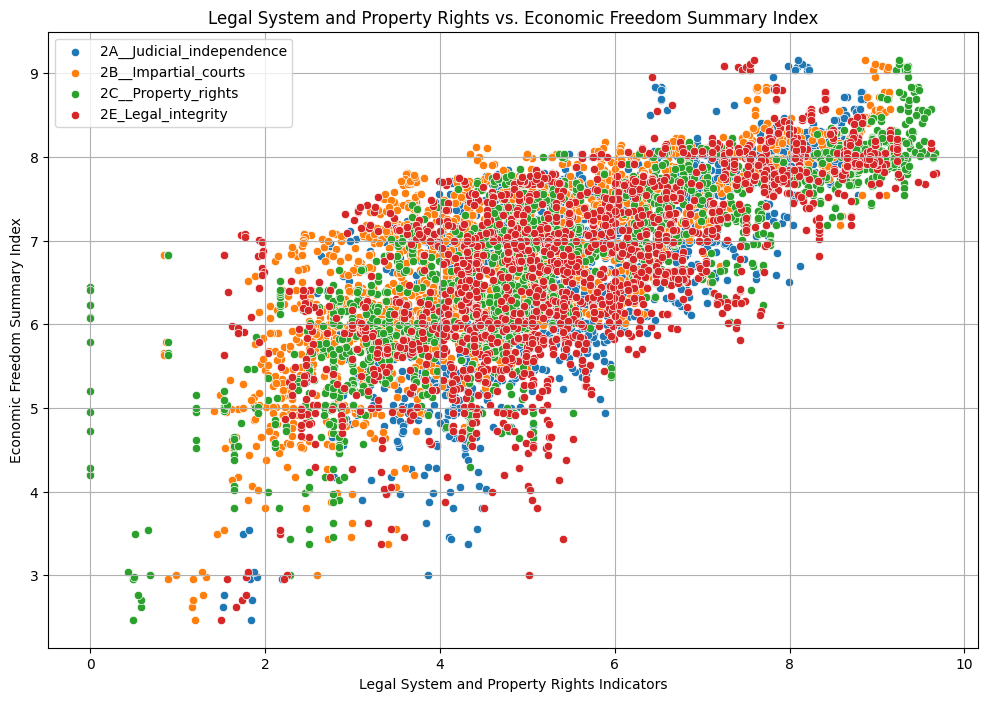

In [ ]:

legal_columns = ['2A__Judicial_independence', '2B__Impartial_courts', '2C__Property_rights', '2E_Legal_integrity']


plt.figure(figsize=(12, 8))
for column in legal_columns:
    sns.scatterplot(x=column, y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Legal System and Property Rights Indicators')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Legal System and Property Rights vs. Economic Freedom Summary Index')
plt.legend(labels=legal_columns)
plt.grid(True)
plt.show()


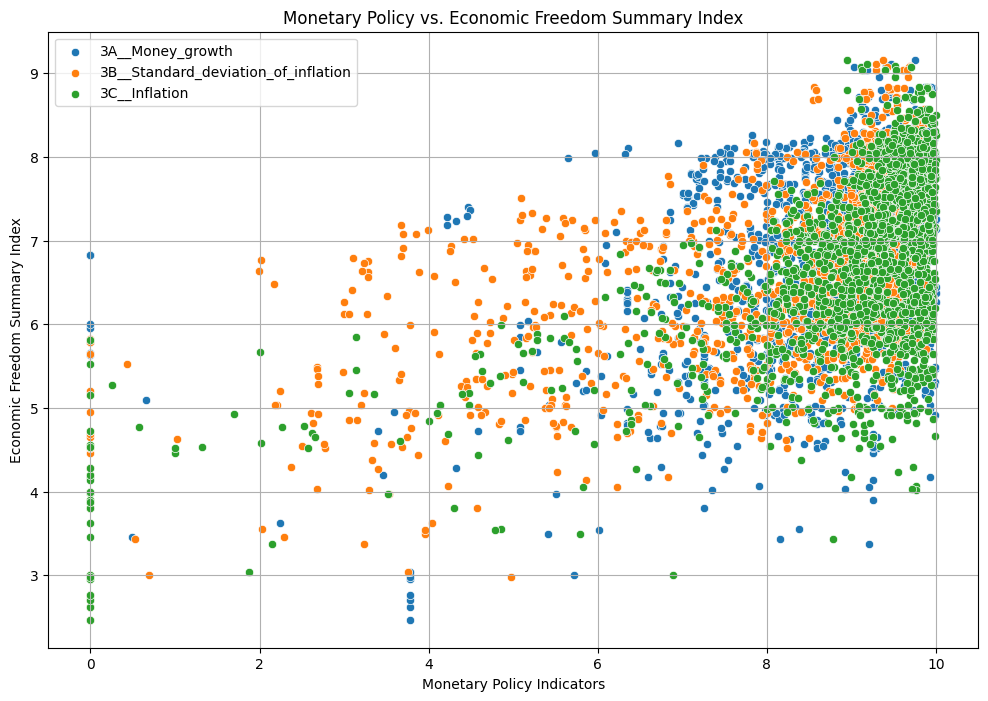

In [ ]:

monetary_columns = ['3A__Money_growth', '3B__Standard_deviation_of_inflation', '3C__Inflation']

plt.figure(figsize=(12, 8))
for column in monetary_columns:
    sns.scatterplot(x=column, y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Monetary Policy Indicators')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Monetary Policy vs. Economic Freedom Summary Index')
plt.legend(labels=monetary_columns)
plt.grid(True)
plt.show()


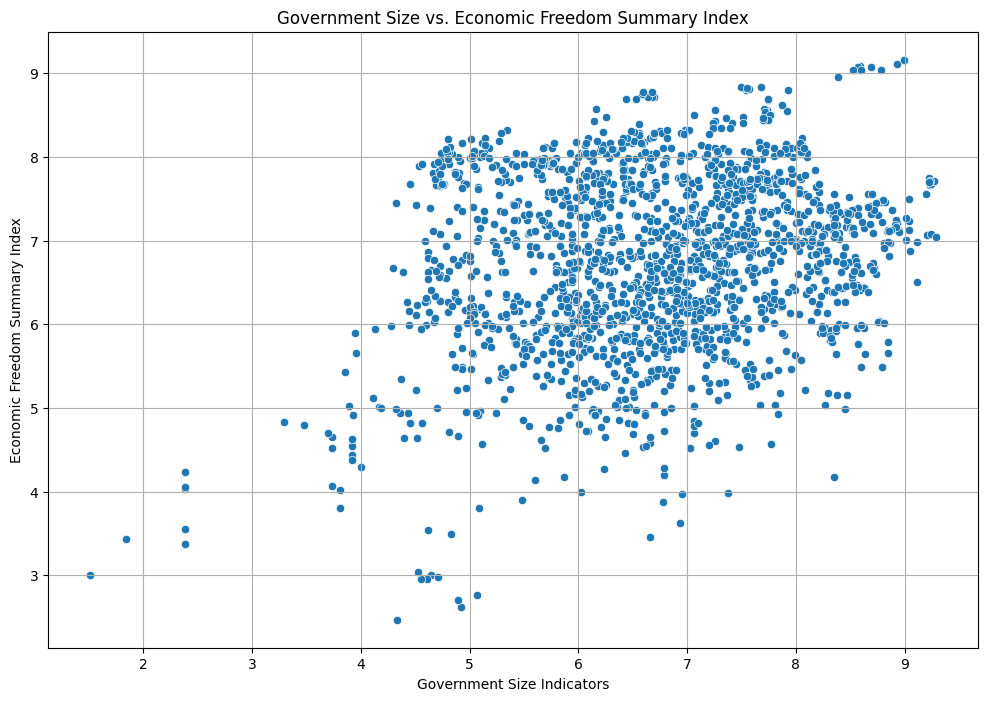

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='1__Size_of_Government', y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Government Size Indicators')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Government Size vs. Economic Freedom Summary Index')
plt.grid(True)
plt.show()


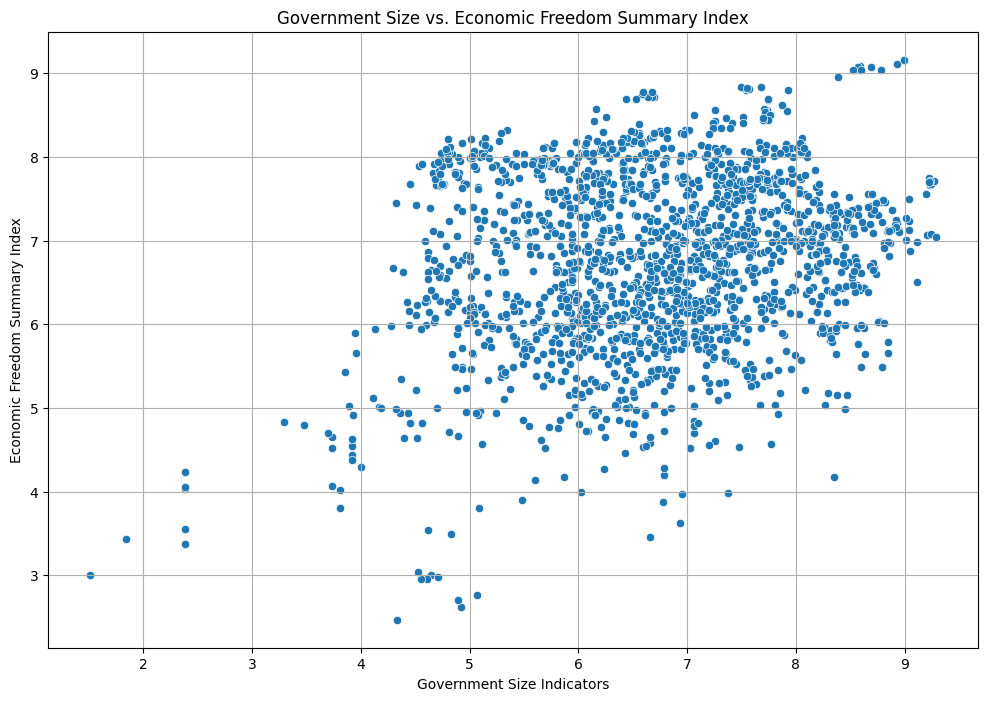

Government Size Indicators - Mean: 6.68, Std Dev: 1.17
Economic Freedom Summary Index - Mean: 6.73, Std Dev: 1.05
Pearson Correlation Coefficient: 0.24 (p-value: 1.52e-25)


In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='1__Size_of_Government', y='Economic_Freedom_Summary_Index', data=df)
plt.xlabel('Government Size Indicators')
plt.ylabel('Economic Freedom Summary Index')
plt.title('Government Size vs. Economic Freedom Summary Index')
plt.grid(True)
plt.show()

# Calculate and print statistics
government_size = df['1__Size_of_Government']
economic_freedom = df['Economic_Freedom_Summary_Index']

# Mean and standard deviation
gov_size_mean = government_size.mean()
gov_size_std = government_size.std()
eco_freedom_mean = economic_freedom.mean()
eco_freedom_std = economic_freedom.std()

# Correlation coefficient
correlation, p_value = pearsonr(government_size, economic_freedom)

print(f"Government Size Indicators - Mean: {gov_size_mean:.2f}, Std Dev: {gov_size_std:.2f}")
print(f"Economic Freedom Summary Index - Mean: {eco_freedom_mean:.2f}, Std Dev: {eco_freedom_std:.2f}")
print(f"Pearson Correlation Coefficient: {correlation:.2f} (p-value: {p_value:.2e})")


In [ ]:
numerical_columns = df_reduced.select_dtypes(include=[ 'float']).columns

columns_with_zeros_or_negatives = numerical_columns[(df_reduced[numerical_columns] <= 0).any()]

columns_with_zeros_or_negatives

Index(['1A_Government_consumption', 'data.1', '1C__Government_investment',
       'data.3', '1Dii_Top_marginal_income_and_payroll_tax_rate',
       '2H_Police_and_crime', '3D__Foreign_currency_bank_accounts', 'data.8',
       '4Dii__Capital_controls', '4Diii_Freedom_of_foreigners_to_visit',
       '5Bv_Cost_of_worker_dismissal', '5Bvi__Conscription'],
      dtype='object')

In [ ]:
skewness = df_reduced[columns_with_zeros_or_negatives].skew()

print("Skewness of columns with zero or negative values:")
print(skewness)

Skewness of columns with zero or negative values:
1A_Government_consumption                       -0.476676
data.1                                           0.919074
1C__Government_investment                       -1.104414
data.3                                          -0.279110
1Dii_Top_marginal_income_and_payroll_tax_rate    0.084299
2H_Police_and_crime                             -0.035045
3D__Foreign_currency_bank_accounts              -0.826765
data.8                                           0.761792
4Dii__Capital_controls                           0.416639
4Diii_Freedom_of_foreigners_to_visit            -0.185601
5Bv_Cost_of_worker_dismissal                    -0.723409
5Bvi__Conscription                              -0.618868
dtype: float64


In [ ]:
df.head()

,Countries,1A_Government_consumption,data.1,1C__Government_investment,data.3,1Dii_Top_marginal_income_and_payroll_tax_rate,2H_Police_and_crime,data.6,3D__Foreign_currency_bank_accounts,data.8,4Dii__Capital_controls,4Diii_Freedom_of_foreigners_to_visit,5Bv_Cost_of_worker_dismissal,5Bvi__Conscription,World_Bank_Region,Income_Classification
0,0,0.965832,0.542428,7.545714,23.0,0.622989,5.303921,1.251677,10.0,0.425138,0.528220,8.739426,-0.373444,10.0,1,3
1,1,-0.928751,0.229842,3.997143,35.0,-1.375163,5.895796,2.212194,5.0,1.187843,-1.044578,0.000000,0.198538,3.0,3,2
2,2,0.668532,-1.249707,8.900000,25.0,0.622989,2.088988,2.328775,5.0,0.647103,-0.293056,0.000000,-0.256141,0.0,6,2
3,3,-0.037414,1.109200,8.702857,35.0,-1.823495,5.955772,2.505278,5.0,2.236834,-1.584894,0.000000,-1.344617,10.0,2,3
4,4,0.322772,0.464402,8.977143,22.0,0.622989,7.084931,1.157234,10.0,0.927341,0.975051,10.000000,0.951988,0.0,1,3


In [ ]:


columns_to_transform = ['3D__Foreign_currency_bank_accounts',
                        'data.8','4Dii__Capital_controls',
                        '4Diii_Freedom_of_foreigners_to_visit',
                        '5Bv_Cost_of_worker_dismissal',
                        '5Bvi__Conscription', '1A_Government_consumption',
                        'data.1', '1C__Government_investment', 'data.3',
                        '1Dii_Top_marginal_income_and_payroll_tax_rate',
                        '2H_Police_and_crime', 'data.6'
                        ]

pt = PowerTransformer(method='yeo-johnson')

df_reduced[columns_to_transform] = pt.fit_transform(df_reduced[columns_to_transform])

skewness_after = df_reduced[columns_to_transform].skew()
print(skewness_after)


3D__Foreign_currency_bank_accounts              -0.464365
data.8                                          -0.017693
4Dii__Capital_controls                           0.004330
4Diii_Freedom_of_foreigners_to_visit            -0.133335
5Bv_Cost_of_worker_dismissal                    -0.007647
5Bvi__Conscription                              -0.480506
1A_Government_consumption                        0.004146
data.1                                          -0.014423
1C__Government_investment                       -0.176598
data.3                                           0.022806
1Dii_Top_marginal_income_and_payroll_tax_rate   -0.041500
2H_Police_and_crime                             -0.022067
data.6                                          -0.025432
dtype: float64


In [ ]:
def calculate_vif(df_reduced):
    vif = pd.DataFrame()
    vif['Feature'] = df_reduced.columns
    vif['VIF'] = [variance_inflation_factor(df_reduced.values, i) for i in range(df_reduced.shape[1])]
    return vif

vif = calculate_vif(df_reduced)
print(vif)

                                          Feature       VIF
0                                       Countries  3.974662
1                       1A_Government_consumption  1.407732
2                                          data.1  2.070330
3                       1C__Government_investment  6.874164
4                                          data.3  8.712011
5   1Dii_Top_marginal_income_and_payroll_tax_rate  1.858221
6                             2H_Police_and_crime  7.223064
7                                          data.6  3.741842
8              3D__Foreign_currency_bank_accounts  7.741438
9                                          data.8  5.580122
10                         4Dii__Capital_controls  1.855164
11           4Diii_Freedom_of_foreigners_to_visit  3.261811
12                   5Bv_Cost_of_worker_dismissal  1.224799
13                             5Bvi__Conscription  3.995580
14                              World_Bank_Region  4.453328
15                          Income_Class

In [ ]:
df = df_reduced
def find_outliers(df):
    outliers_dict = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            num_outliers = outliers.shape[0]
            if num_outliers > 0:
                outliers_dict[col] = num_outliers
                print(f"{col}: {num_outliers} outliers")
            else:
                print(f"{col}: No outliers")

    return outliers_dict


print(find_outliers(df))

1A_Government_consumption: No outliers
data.1: No outliers
1C__Government_investment: No outliers
data.3: No outliers
1Dii_Top_marginal_income_and_payroll_tax_rate: 40 outliers
2H_Police_and_crime: No outliers
data.6: 32 outliers
3D__Foreign_currency_bank_accounts: No outliers
data.8: 26 outliers
4Dii__Capital_controls: No outliers
4Diii_Freedom_of_foreigners_to_visit: No outliers
5Bv_Cost_of_worker_dismissal: No outliers
5Bvi__Conscription: No outliers
{'1Dii_Top_marginal_income_and_payroll_tax_rate': 40, 'data.6': 32, 'data.8': 26}


In [ ]:
def handle_outliers(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df
df_cleaned = handle_outliers(df)
df_cleaned

,Countries,1A_Government_consumption,data.1,1C__Government_investment,data.3,1Dii_Top_marginal_income_and_payroll_tax_rate,2H_Police_and_crime,data.6,3D__Foreign_currency_bank_accounts,data.8,4Dii__Capital_controls,4Diii_Freedom_of_foreigners_to_visit,5Bv_Cost_of_worker_dismissal,5Bvi__Conscription,World_Bank_Region,Income_Classification
0,0,0.960708,0.548194,7.545714,23.0,0.625417,5.303921,1.251677,10.0,0.425138,0.551265,8.739426,-0.243518,10.0,1,3
1,1,-0.921696,0.238247,3.997143,35.0,-1.375614,5.895796,2.212194,5.0,1.187843,-1.047661,0.000000,0.310908,3.0,3,2
2,2,0.686852,-1.254896,8.900000,25.0,0.625417,2.088988,2.328775,5.0,0.647103,-0.258807,0.000000,-0.120983,0.0,6,2
3,3,0.009435,1.106373,8.702857,35.0,-1.829494,5.955772,2.505278,5.0,2.236834,-1.635563,0.000000,-1.428374,10.0,2,3
4,4,0.360698,0.470986,8.977143,22.0,0.625417,7.084931,1.157234,10.0,0.927341,0.972841,10.000000,0.929473,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,160,0.453599,1.033936,0.000000,34.0,-0.138356,0.934051,2.779351,0.0,1.202972,-1.047661,6.526913,1.255958,0.0,2,3
1811,161,0.765535,-0.023439,5.073300,36.0,-0.138356,5.508612,2.103530,0.0,1.029619,-1.047661,0.553128,-1.428374,0.0,0,2
1812,162,1.018371,0.027206,3.894286,15.0,0.994907,0.992338,2.651883,10.0,1.018847,1.161222,0.221251,-1.428374,0.0,3,2
1813,163,0.696490,-1.266678,10.000000,30.0,-0.138356,4.042671,0.899704,10.0,1.558145,1.662125,3.650646,-1.941082,10.0,6,2


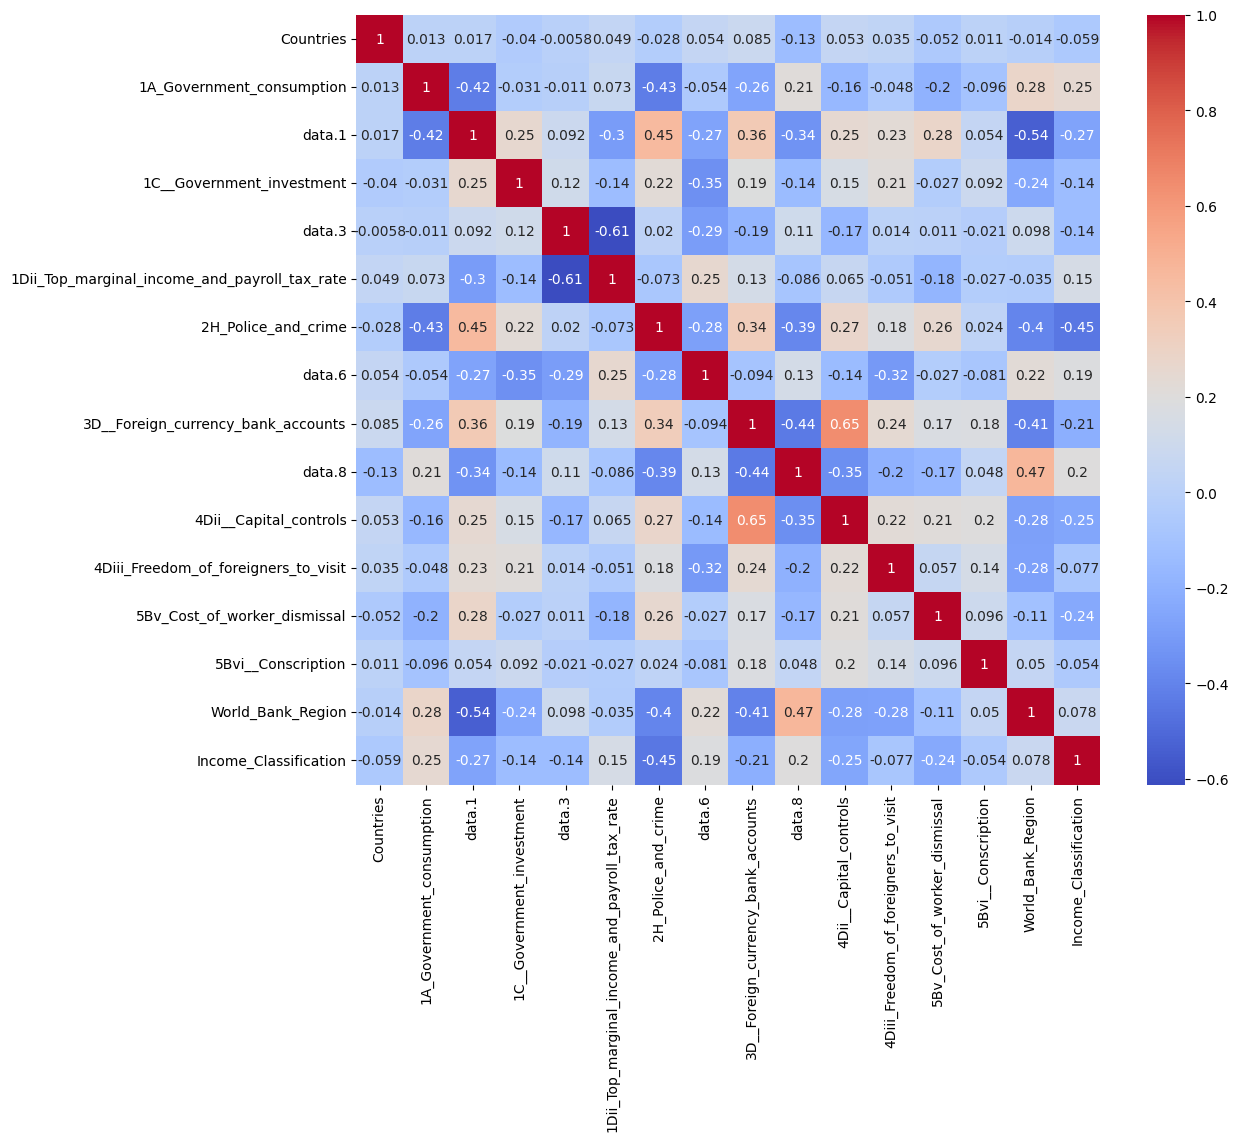

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_cleaned.skew()

Countries                                        0.000000
1A_Government_consumption                       -0.190966
data.1                                          -0.045591
1C__Government_investment                       -1.104414
data.3                                          -0.279110
1Dii_Top_marginal_income_and_payroll_tax_rate   -0.064010
2H_Police_and_crime                             -0.035045
data.6                                           0.769573
3D__Foreign_currency_bank_accounts              -0.826765
data.8                                           0.616864
4Dii__Capital_controls                          -0.097321
4Diii_Freedom_of_foreigners_to_visit            -0.185601
5Bv_Cost_of_worker_dismissal                    -0.399459
5Bvi__Conscription                              -0.618868
World_Bank_Region                                0.451821
Income_Classification                            0.006682
dtype: float64

In [ ]:
df_cleaned.to_csv('cleaned_data.csv')

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
target_variable.to_csv('target_data.csv')

In [ ]:
target_variable = pd.read_csv("target_data.csv")

In [ ]:
target_variable.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.corr()

,Countries,1A_Government_consumption,data.1,1C__Government_investment,data.3,1Dii_Top_marginal_income_and_payroll_tax_rate,2H_Police_and_crime,data.6,3D__Foreign_currency_bank_accounts,data.8,4Dii__Capital_controls,4Diii_Freedom_of_foreigners_to_visit,5Bv_Cost_of_worker_dismissal,5Bvi__Conscription,World_Bank_Region,Income_Classification
Countries,1.000000,0.011554,0.016794,-0.061724,-0.005654,0.048208,-0.027914,0.041012,0.086407,-0.125701,0.058805,0.033601,-0.039163,0.022628,-0.013898,-0.059423
1A_Government_consumption,0.011554,1.000000,-0.434670,-0.050248,-0.044402,0.080410,-0.431374,0.014758,-0.264850,0.219328,-0.157170,-0.048687,-0.187450,-0.093216,0.286861,0.239152
data.1,0.016794,-0.434670,1.000000,0.273131,0.108926,-0.301834,0.452171,-0.336655,0.356161,-0.327200,0.242248,0.220559,0.272086,0.043111,-0.540117,-0.270302
1C__Government_investment,-0.061724,-0.050248,0.273131,1.000000,0.097651,-0.119447,0.210545,-0.321519,0.272024,-0.179348,0.192415,0.197583,0.015837,0.065560,-0.251455,-0.170119
data.3,-0.005654,-0.044402,0.108926,0.097651,1.000000,-0.611551,0.043819,-0.297845,-0.159852,0.104983,-0.160160,0.014142,0.017117,-0.019010,0.083872,-0.159685
1Dii_Top_marginal_income_and_payroll_tax_rate,0.048208,0.080410,-0.301834,-0.119447,-0.611551,1.000000,-0.071018,0.278454,0.138016,-0.107174,0.066533,-0.046603,-0.159972,-0.021504,-0.035529,0.147368
2H_Police_and_crime,-0.027914,-0.431374,0.452171,0.210545,0.043819,-0.071018,1.000000,-0.309585,0.352961,-0.421069,0.271203,0.175036,0.272316,0.014044,-0.396679,-0.454891
data.6,0.041012,0.014758,-0.336655,-0.321519,-0.297845,0.278454,-0.309585,1.000000,-0.144563,0.176490,-0.152200,-0.301518,-0.056771,-0.072946,0.246727,0.221294
3D__Foreign_currency_bank_accounts,0.086407,-0.264850,0.356161,0.272024,-0.159852,0.138016,0.352961,-0.144563,1.000000,-0.406839,0.645627,0.234150,0.221007,0.163563,-0.409250,-0.250255
data.8,-0.125701,0.219328,-0.327200,-0.179348,0.104983,-0.107174,-0.421069,0.176490,-0.406839,1.000000,-0.345703,-0.207444,-0.194939,0.051467,0.461543,0.206593


In [ ]:
df.drop(columns=['Area_3_Rank'], inplace=True)


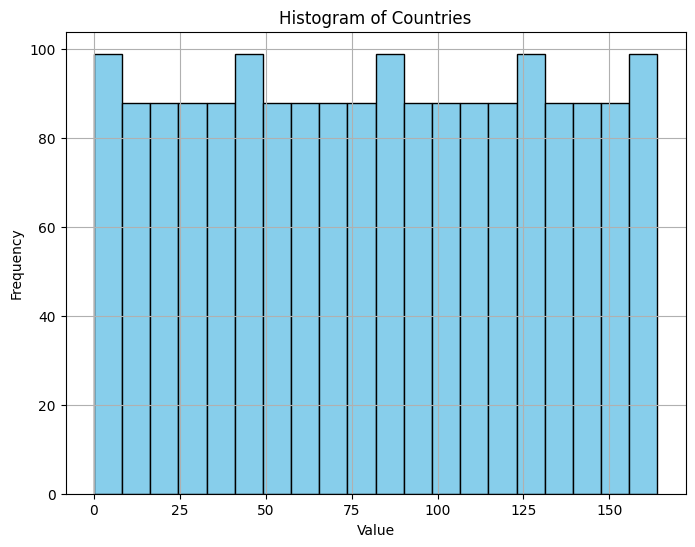

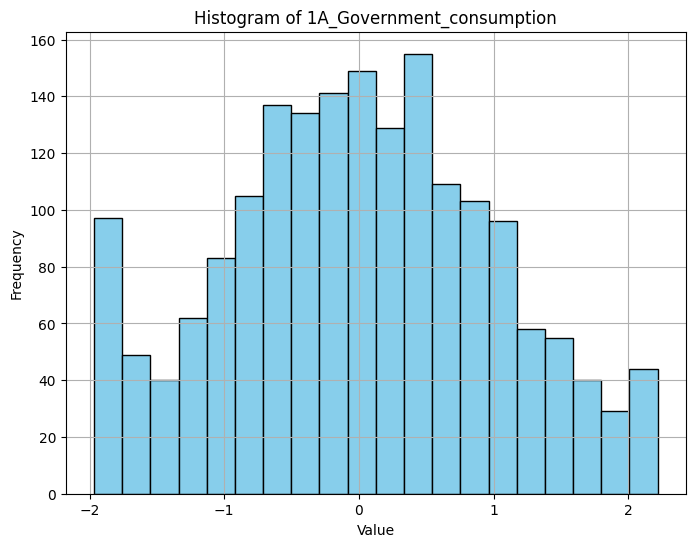

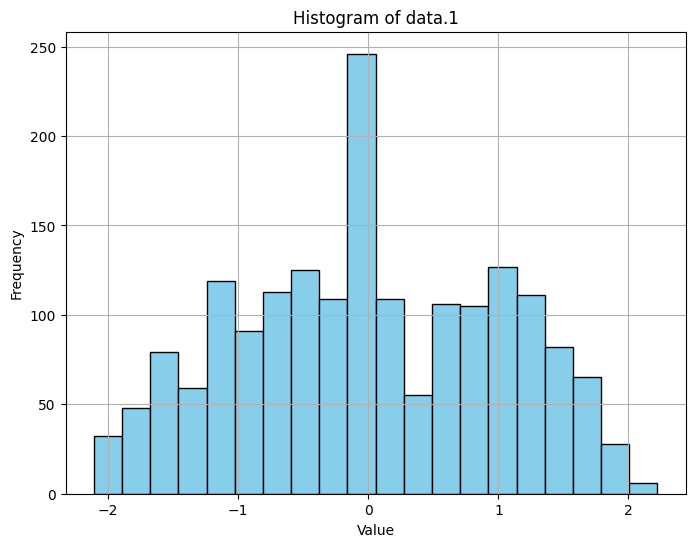

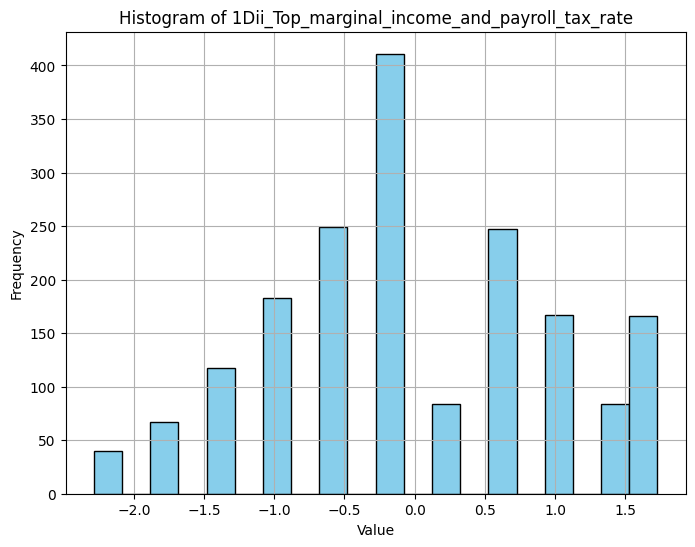

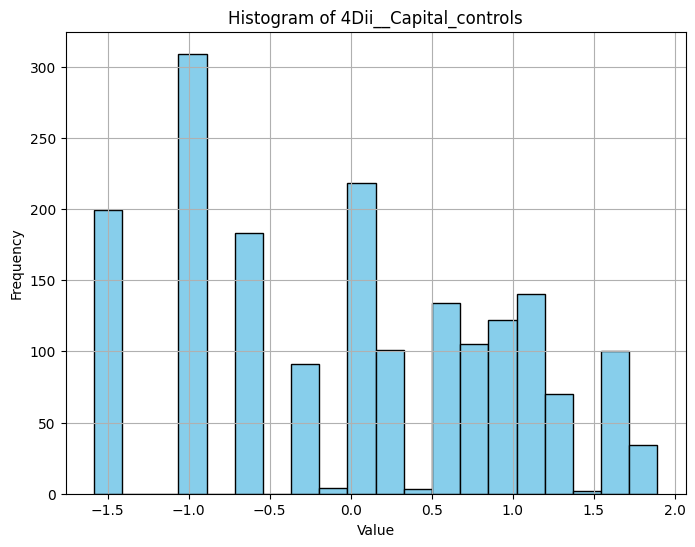

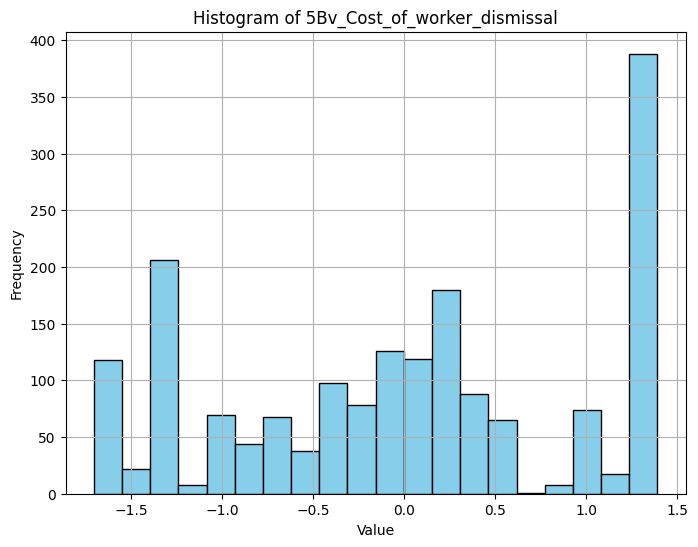

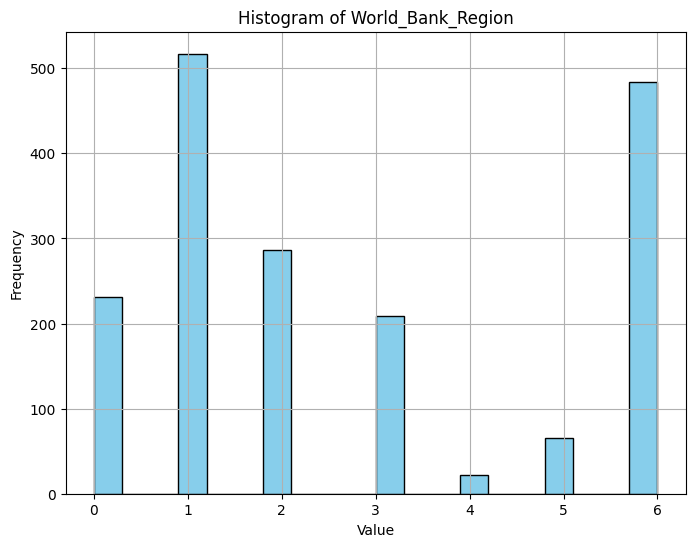

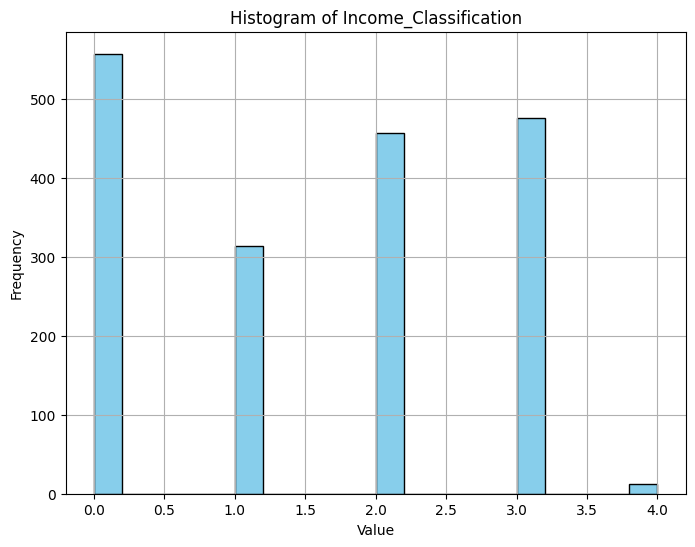

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_reduced[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

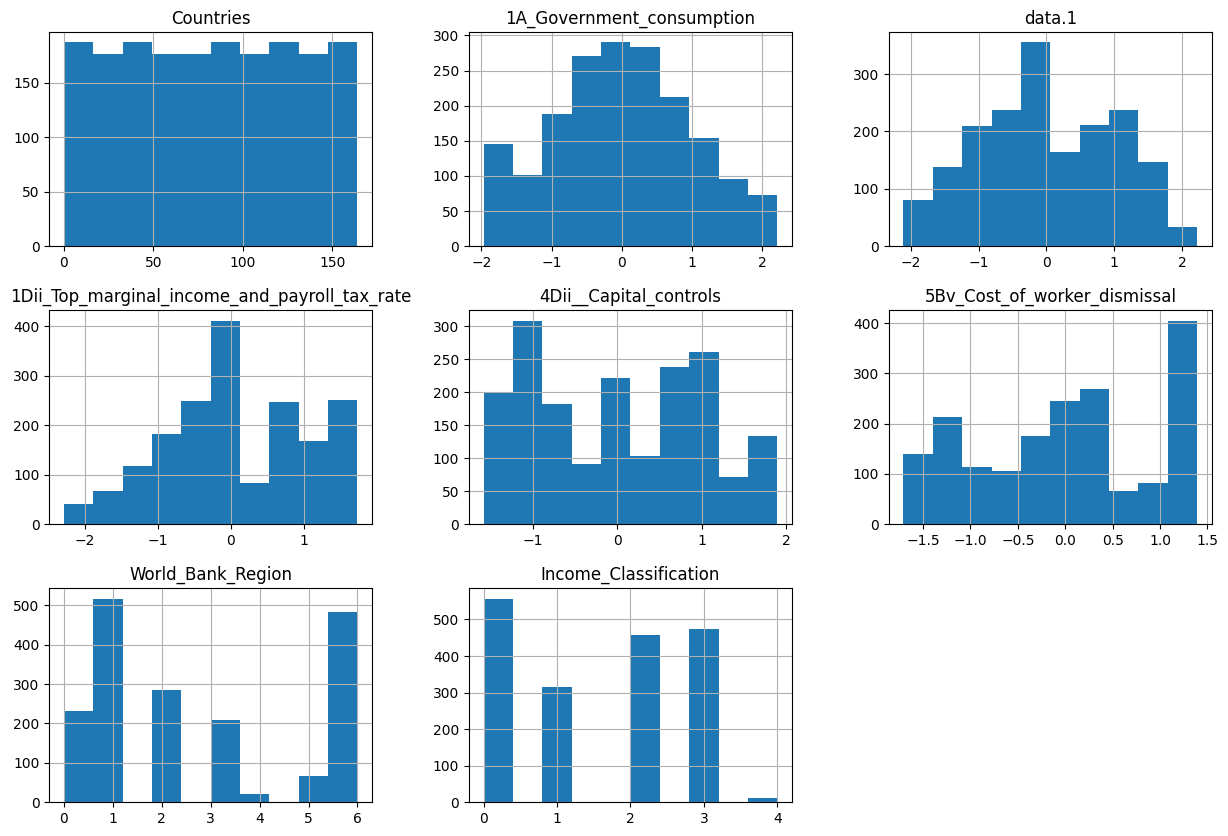

In [ ]:
df.hist(figsize=(15, 10))
plt.show()

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df)
model = sm.OLS(target_variable, X).fit()
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Economic_Freedom_Summary_Index   R-squared:                       0.802
Model:                                        OLS   Adj. R-squared:                  0.801
Method:                             Least Squares   F-statistic:                     456.3
Date:                            Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                                    21:38:43   Log-Likelihood:                -1189.1
No. Observations:                            1815   AIC:                             2412.
Df Residuals:                                1798   BIC:                             2506.
Df Model:                                      16                                         
Covariance Type:                        nonrobust                                         
                                                    coef    std err          t      P>|t| 

In [ ]:
def remove_high_p_columns(X, y, threshold=0.05):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    p_values = model.pvalues[1:]
    high_p_columns = p_values[p_values > threshold].index.tolist()
    X_selected = X.drop(columns=high_p_columns)
    return X_selected
df = remove_high_p_columns(df,target_variable)
print(df.columns.tolist())

['1A_Government_consumption', 'data.1', '1C__Government_investment', '1Dii_Top_marginal_income_and_payroll_tax_rate', '2H_Police_and_crime', 'data.6', '3D__Foreign_currency_bank_accounts', 'data.8', '4Dii__Capital_controls', '4Diii_Freedom_of_foreigners_to_visit', '5Bvi__Conscription', 'World_Bank_Region', 'Income_Classification']


In [ ]:
df.head()

,1A_Government_consumption,data.1,1C__Government_investment,1Dii_Top_marginal_income_and_payroll_tax_rate,2H_Police_and_crime,data.6,3D__Foreign_currency_bank_accounts,data.8,4Dii__Capital_controls,4Diii_Freedom_of_foreigners_to_visit,5Bvi__Conscription,World_Bank_Region,Income_Classification
0,0.965879,0.541815,-0.301272,0.622826,0.065973,0.099863,0.814998,-1.099431,0.522347,0.941727,0.798025,1,3
1,-0.928869,0.228960,-1.206133,-1.374895,0.309988,1.205518,-0.942549,0.426244,-1.043443,-1.330276,-1.116624,3,2
2,0.667492,-1.249156,0.413038,0.622826,-1.242698,1.308635,-0.942549,-0.587874,-0.300870,-1.330276,-1.408464,6,2
3,-0.039590,1.109483,0.288866,-1.822863,0.334796,1.455771,-0.942549,1.849765,-1.573102,-1.330276,0.798025,2,3
4,0.320883,0.463704,0.463599,0.622826,0.803954,-0.044242,0.814998,-0.028202,0.975174,1.307783,-1.408464,1,3


In [ ]:
df.to_csv('ready_data.csv')